In [32]:
# Import packages, the Y-matrix for the dataset and Functions.py
import numpy as np
%run Dublin_data_import.ipynb
import sys
sys.path.append('../')
from Functions import * 
import copy
import random
%store -r points
%store -r random_numbers_matrix

In [37]:
num_samples = 410
alpha = 1
dim = 2

In [38]:
def LR(x):
    return np.exp(-x/70)*0.01+0.00001

In [39]:
True_posetiv = np.zeros(len(random_numbers_matrix))
True_negativ = np.zeros(len(random_numbers_matrix))
False_posetiv = np.zeros(len(random_numbers_matrix))
False_negativ = np.zeros(len(random_numbers_matrix))

True_posetiv_baseline = np.zeros(len(random_numbers_matrix))
True_negativ_baseline = np.zeros(len(random_numbers_matrix))
False_posetiv_baseline = np.zeros(len(random_numbers_matrix))
False_negativ_baseline = np.zeros(len(random_numbers_matrix))

Accuracy = np.zeros(len(random_numbers_matrix))
Accuracy_baseline = np.zeros(len(random_numbers_matrix))

MLL_final = np.zeros(len(random_numbers_matrix)) # Define the MLL
grad_sum_final = np.zeros(len(random_numbers_matrix)) # Define the gradient sum

for s in range(len(random_numbers_matrix)): #len(random_numbers_matrix)
    Y_updated = np.delete(Y,random_numbers_matrix[s].flatten().astype(int), axis=0)

    prev_grad = 1000000002
    grad = 0
    n = 100000
    points_copy = copy.deepcopy(points)
    MLL = np.zeros(n) # Define the MLL
    grad_sum = np.zeros(n) # Define the gradient sum
    k = 0

    while abs(prev_grad - grad) > 0.1: # stopping criteria
        print(prev_grad - grad)
        prev_grad = grad
        for i in range(1,num_samples+1): # Run over number of num_samples
            grad_now = Gradient_function_fast(i,dim,Y_updated,points_copy,alpha)
            grad_sum[k] += np.sum((grad_now)**2)
            points_copy[i] += LR(k+1)*grad_now # Use Gradient_function and take step=0.1*grad
        grad = grad_sum[k]
        MLL[k] = Loss_function_fast(points_copy,Y_updated,alpha) # Calcualte the probability using Loss_function
        k += 1
    print(s)

    MLL_final[s] = MLL[k-1]
    grad_sum_final[s] = grad_sum[k-1]

    connections = Y[random_numbers_matrix[s].flatten().astype(int), 0]
    point_a = [points_copy[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),1]]
    point_b = [points_copy[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),2]]
    points_a_np = np.array(point_a)
    points_b_np = np.array(point_b)

    distances = np.sum((points_a_np - points_b_np) ** 2, axis=1)
    sigmoid_value = 1 / (1 + np.exp(-1 * (alpha - distances)))

    True_posetiv[s] = np.sum(connections*sigmoid_value >= 0.5)
    False_posetiv[s] = np.sum(connections*sigmoid_value <= -0.5)
    True_negativ[s] = np.sum((connections*sigmoid_value > -0.5) & (connections*sigmoid_value < 0))
    False_negativ[s] = np.sum((connections*sigmoid_value >= 0) & (connections*sigmoid_value < 0.5))

    Baseline = Baseline_function(Y,random_numbers_matrix[s].flatten().astype(int),Y_updated)
    True_posetiv_baseline[s] = np.sum(connections*Baseline >= 0.5)
    False_posetiv_baseline[s] = np.sum(connections*Baseline <= -0.5)
    True_negativ_baseline[s] = np.sum((connections*Baseline > -0.5) & (connections*sigmoid_value <= 0))
    False_negativ_baseline[s] = np.sum((connections*Baseline > 0) & (connections*sigmoid_value < 0.5))

    Accuracy[s] = (True_posetiv[s]+True_negativ[s])/(len(sigmoid_value))
    Accuracy_baseline[s] = (True_posetiv_baseline[s]+True_negativ_baseline[s])/(len(Baseline))

1000000002
-610581.6643743597
369945.7029633244
71046.42509834649
36156.15838347722
19569.837218512286
9754.23738439902
5391.417004263203
4404.839495934706
4837.038289873424
5818.57682663115
6418.0818177345645
6268.67469992736
5791.766613827029
5322.619074307018
5439.985336928214
5280.7740613951755
4552.211746172201
4087.4037251053524
3705.9322150426597
3183.7628401963157
2576.420865666558
1981.238604170907
1431.42983686335
1010.1600934966409
835.028889709607
891.5819453885633
1009.3099109066861
1046.0728635191372
1009.6622346301592
951.252178595405
890.227632871105
830.2471250790804
776.1050667207019
732.7739388494956
700.7698023438061
673.3377351398358
636.9865856419674
587.3103934519186
534.8660008949773
487.624030802519
444.7732917455087
403.4555652282652
362.1717503864984
322.0806811968814
287.90145624167235
266.1069220876252
261.43687253543067
274.35260134080636
300.7160410225042
332.60109271442343
359.38654522796423
371.82757247700647
368.23108935712116
355.0297969077037
340.092

In [40]:
(True_posetiv[s]+True_negativ[s])/(len(sigmoid_value))

0.9580152671755725

In [6]:
conf_matrix = np.array([[np.mean(True_posetiv), np.mean(False_negativ)],
                        [np.mean(False_posetiv), np.mean(True_negativ)]])
Accuracy = (np.mean(True_posetiv)+np.mean((True_negativ)))/(len(sigmoid_value))

In [43]:
stupid_baseline = [2765/num_connectins] * len(sigmoid_value) 

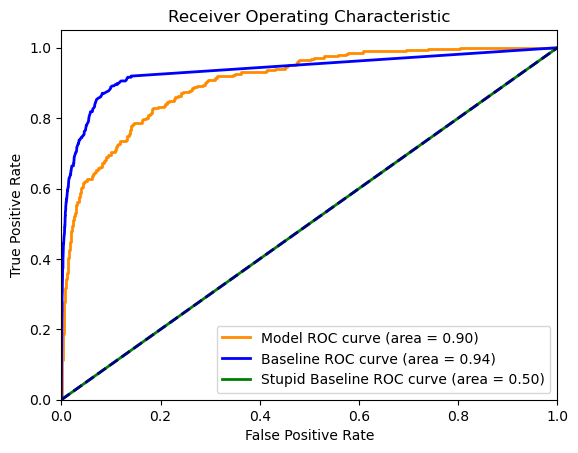

In [44]:
from sklearn.metrics import roc_curve, auc
# Compute FPR, TPR, and thresholds
y_true = connections
y_true[y_true == -1] = 0

# Compute ROC curve and AUC for sigmoid_value predictions
fpr1, tpr1, _ = roc_curve(y_true, sigmoid_value)
roc_auc1 = auc(fpr1, tpr1)

# Compute ROC curve and AUC for baseline predictions
fpr2, tpr2, _ = roc_curve(y_true, Baseline)
roc_auc2 = auc(fpr2, tpr2)

# Compute ROC curve and AUC for stupid baseline predictions
fpr3, tpr3, _ = roc_curve(y_true, stupid_baseline)
roc_auc3 = auc(fpr3, tpr3)

# Plot the ROC curve for all models
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='Model ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='blue', lw=2, label='Baseline ROC curve (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='green', lw=2, label='Stupid Baseline ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

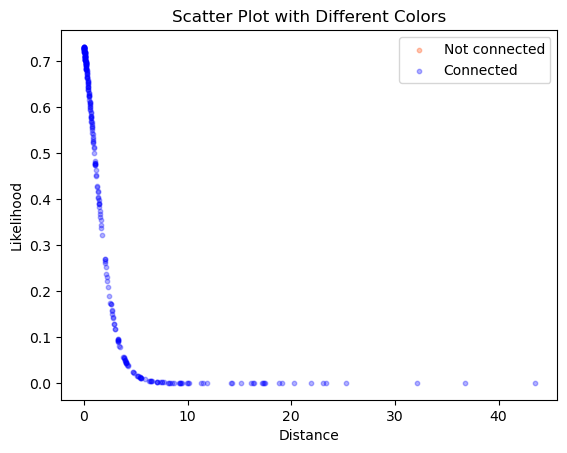

In [45]:
plt.scatter(distances[connections == -1], sigmoid_value[connections == -1], color='orangered', label='Not connected', s=10, alpha=0.3)
plt.scatter(distances[connections == 1], sigmoid_value[connections == 1], color='blue', label='Connected', s=10, alpha=0.3)
plt.xlabel('Distance')
#plt.xlim(4,5)
plt.ylabel('Likelihood')
plt.title('Scatter Plot with Different Colors')
plt.legend()
plt.show()


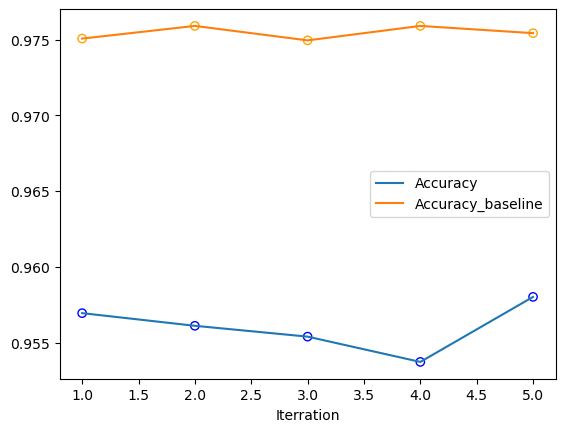

In [52]:
x = [1,2,3,4,5]
plt.plot(x,Accuracy,label='Accuracy')
plt.plot(x,Accuracy_baseline, label='Accuracy_baseline')
plt.scatter(x,Accuracy, facecolors='none', edgecolors='blue')
plt.scatter(x,Accuracy_baseline, facecolors='none', edgecolors='orange')
#plt.ylabel('MLL')
plt.xlabel('Iterration')
plt.legend()
plt.show()

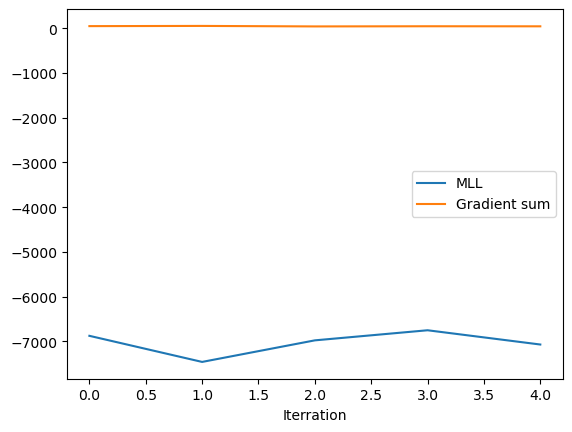

In [53]:
plt.plot(MLL_final,label='MLL')
plt.plot(np.sqrt(grad_sum_final), label='Gradient sum')
#plt.ylabel('MLL')
plt.xlabel('Iterration')
plt.legend()
plt.show()

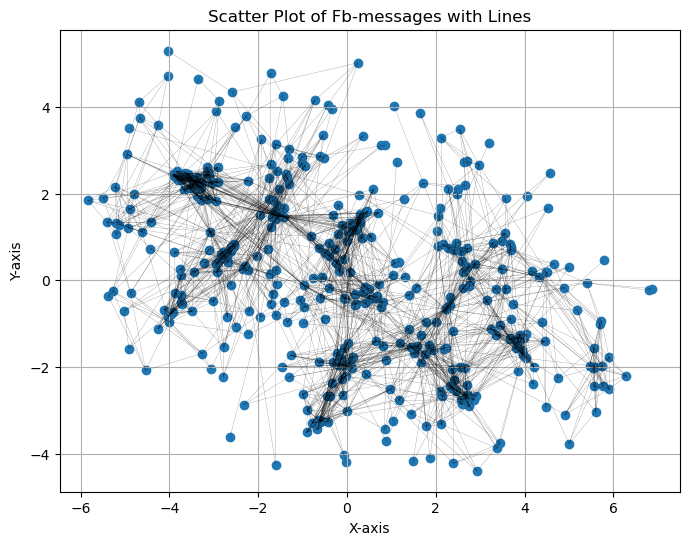

In [49]:
plt.figure(figsize=(8, 6))

for m in range(len(Y)): 
    if Y[m][0] == 1: # Check if there is a connection between Y[m][1] and Y[m][2]
        point1 = points_copy[Y[m][1]]
        point2 = points_copy[Y[m][2]]
        plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='black', linewidth=0.1) # Ad a line between Y[m][1] and Y[m][2]

# extract the points and plot them
x = [point[0] for point in points_copy.values()]
y = [point[1] for point in points_copy.values()]
plt.scatter(x, y)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Dublin with Lines')
plt.grid(True)
plt.show()